In [3]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# IRIS Data

In [37]:
dataset = r"./IRIS.csv"

In [38]:
df = pd.read_csv(dataset)
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
41,42,4.5,2.3,1.3,0.3,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
143,144,6.8,3.2,5.9,2.3,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa


In [39]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [40]:
X = df.drop(columns=['Species', 'Id'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Performing Elbow method

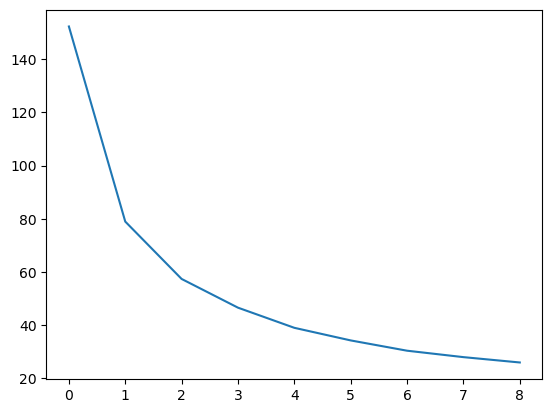

In [42]:
plt.plot(inertias)

In [ ]:
inertias = []
for i in range(2,11):
    kmean = KMeans(
        n_clusters=i
    )
#     kmean.fit(pd.DataFrame(np.random.random(10)))
    kmean.fit_predict(X.values)
    inertias.append(kmean.inertia_)
    

## Clustering

In [43]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(X)


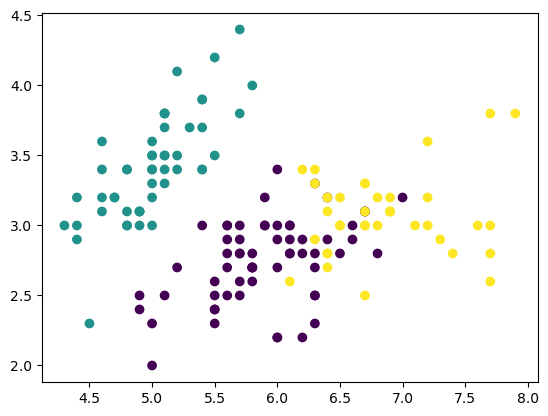

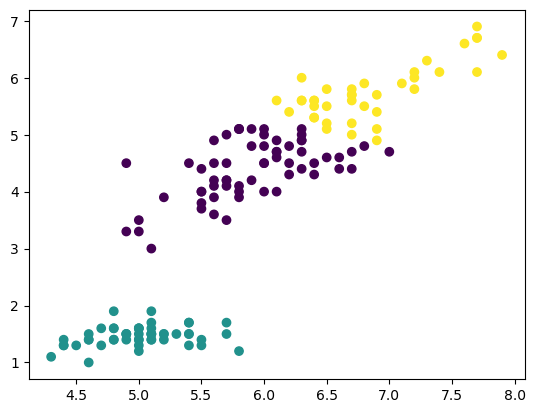

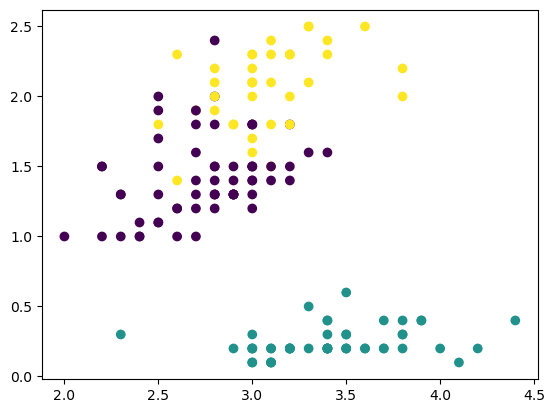

In [45]:
for cl in range(len(X.columns)):
    for i in range(cl+1, len(X.columns) - 1):
        plt.scatter(X[X.columns[cl]], X[X.columns[cl+i]], c=model.predict(X))
        plt.show()

In [46]:
clusters = str(model.labels_)
exl = []
exl.append(
{
    'dataset': 'iris',
    'value_of_k': 3,
    'clusters': clusters
})

# Wine data

In [47]:
dataset = r"./Wine.csv"

In [48]:
df = pd.read_csv(dataset)
df.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,2
114,12.08,1.39,2.50,22.5,84,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385,2
35,13.48,1.81,2.41,20.5,100,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920,1
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,1
68,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750,2


In [49]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [50]:
X = df.drop(columns=['Customer_Segment'])

## Performing Elbow method

In [ ]:
inertias = []
for i in range(2,11):
    kmean = KMeans(
        n_clusters=i
    )
#     kmean.fit(pd.DataFrame(np.random.random(10)))
    kmean.fit_predict(X.values)
    inertias.append(kmean.inertia_)
    

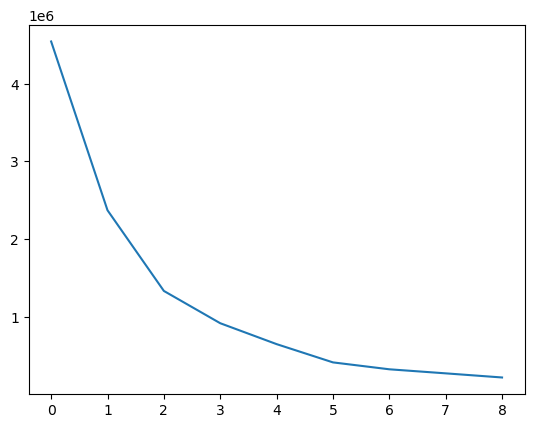

In [52]:
plt.plot(inertias)

 We will take k = 3

## Clustering

In [53]:
model = KMeans(n_clusters=3)

In [ ]:
model.fit(X)

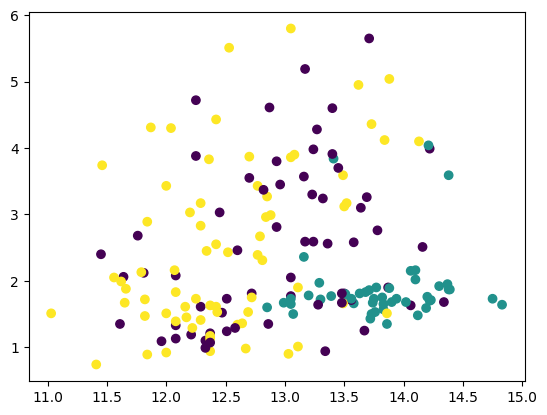

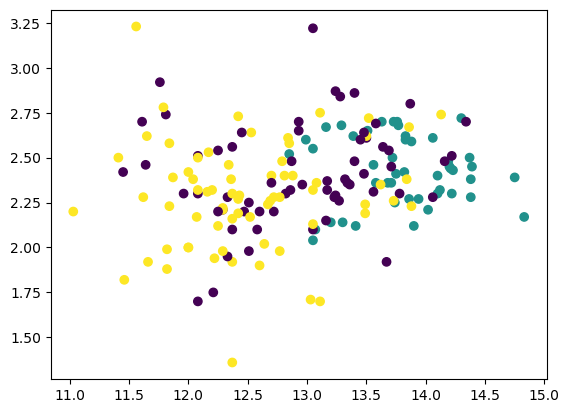

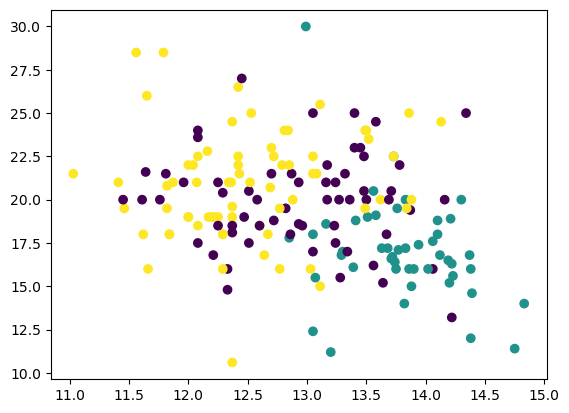

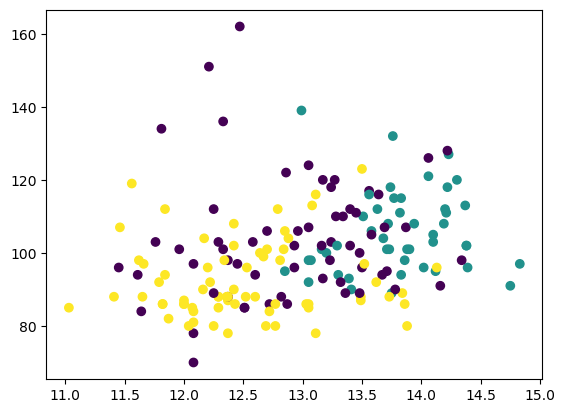

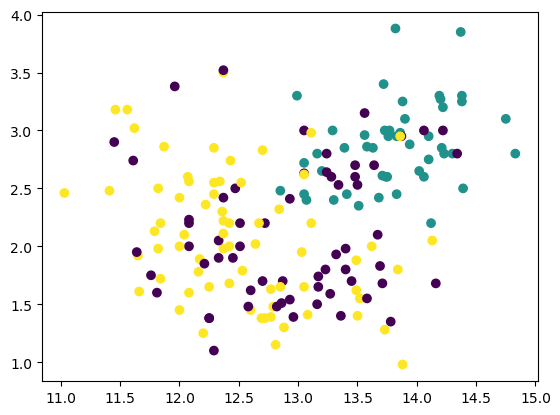

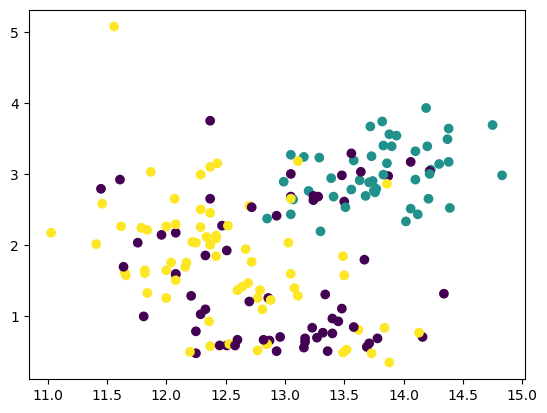

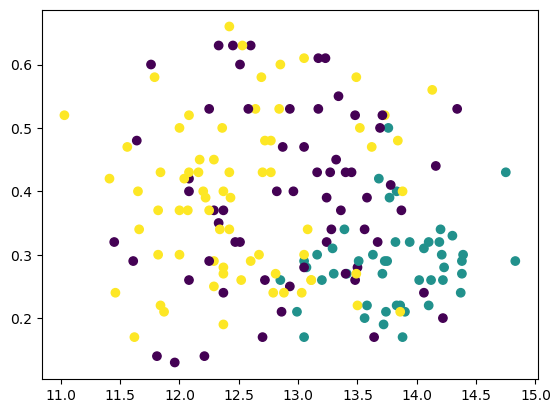

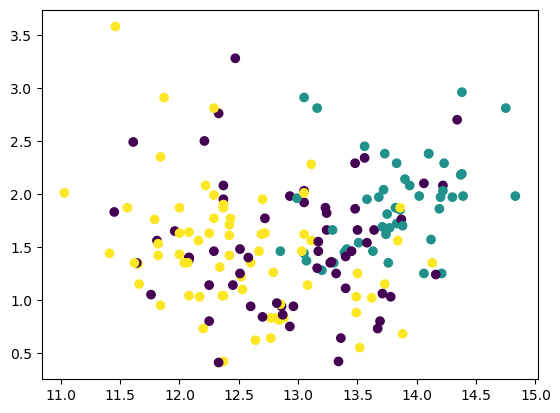

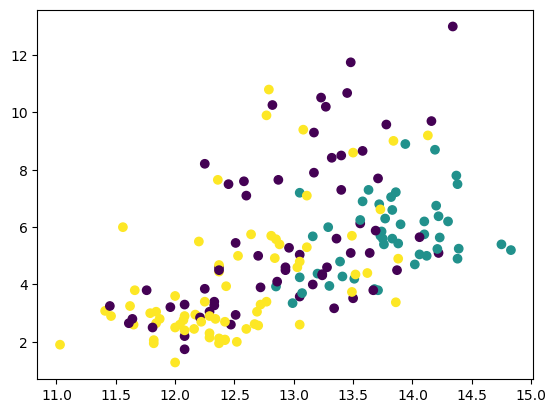

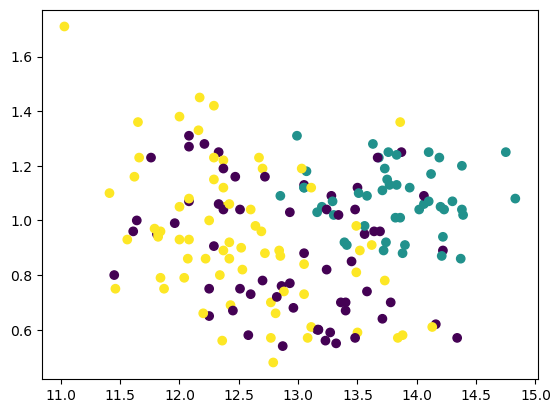

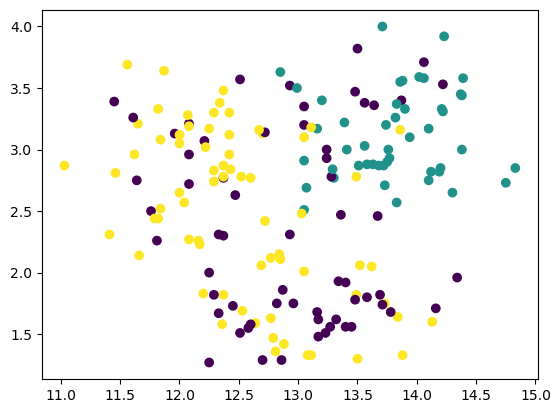

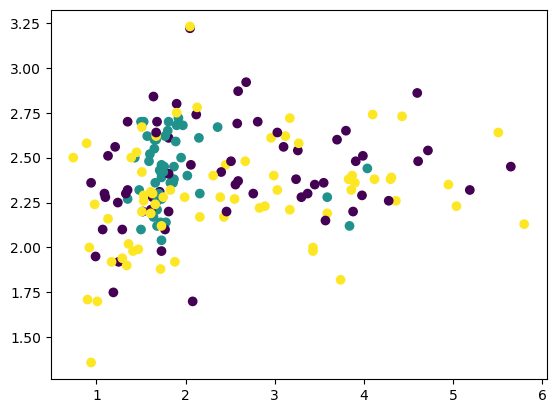

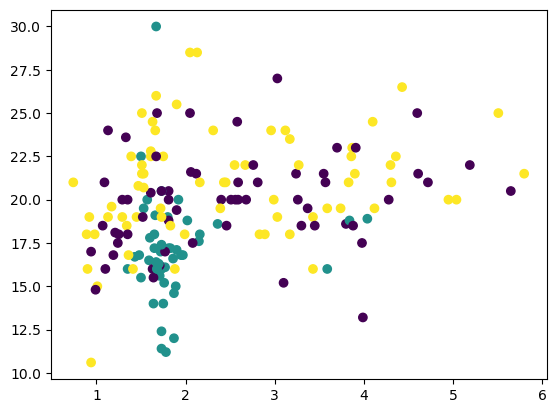

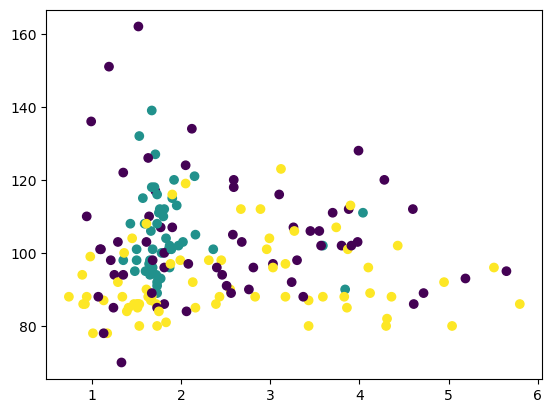

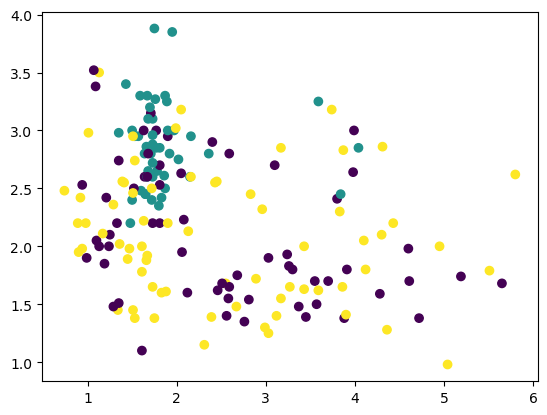

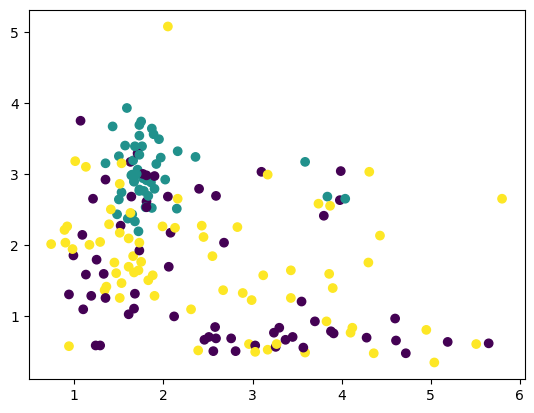

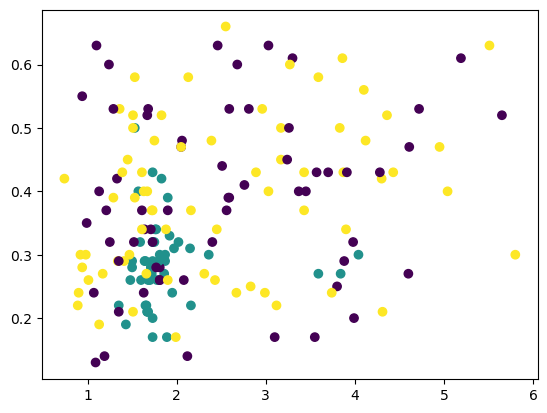

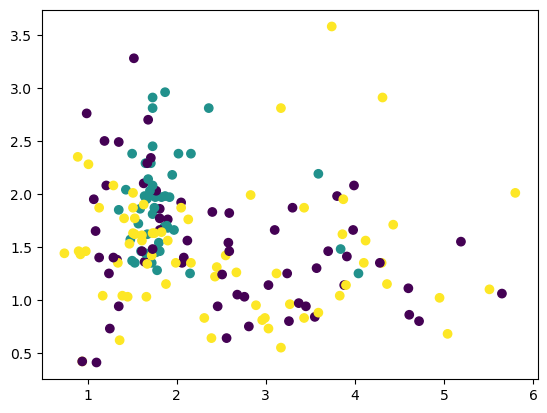

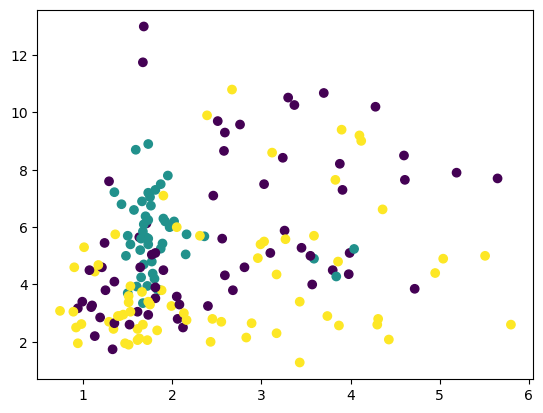

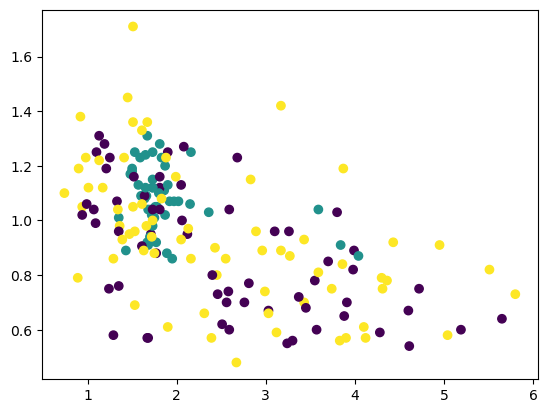

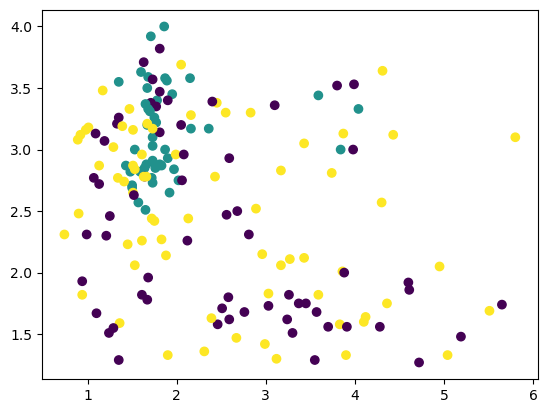

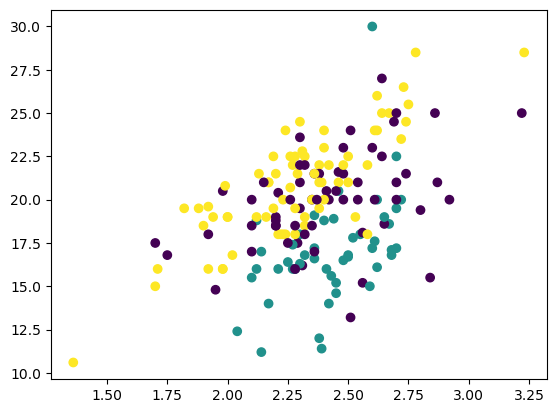

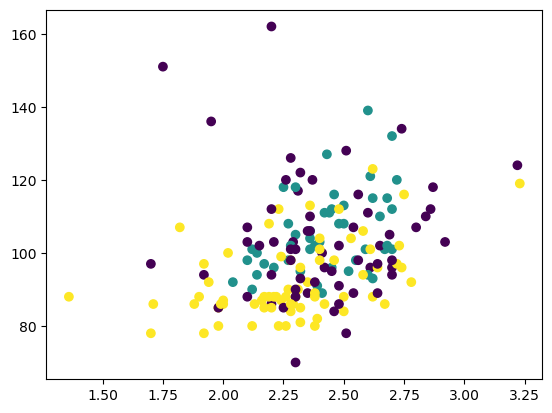

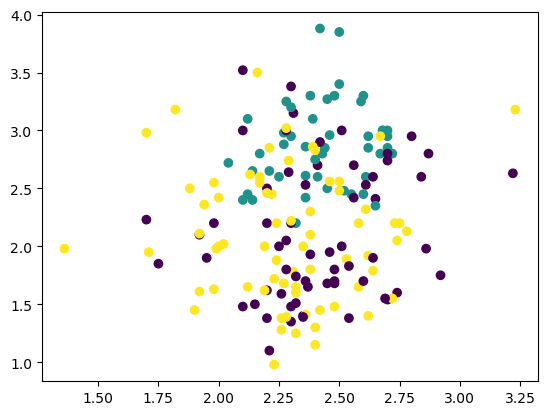

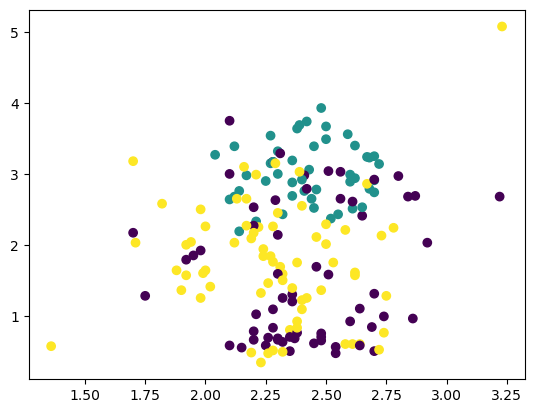

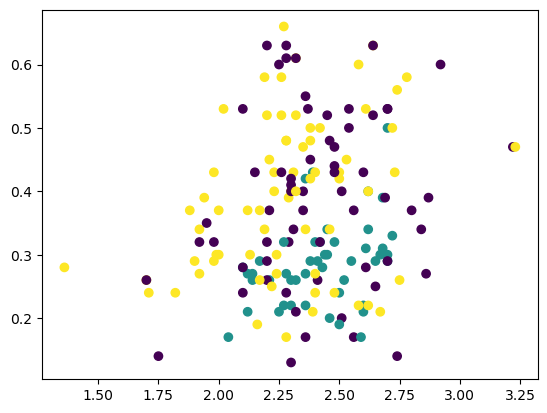

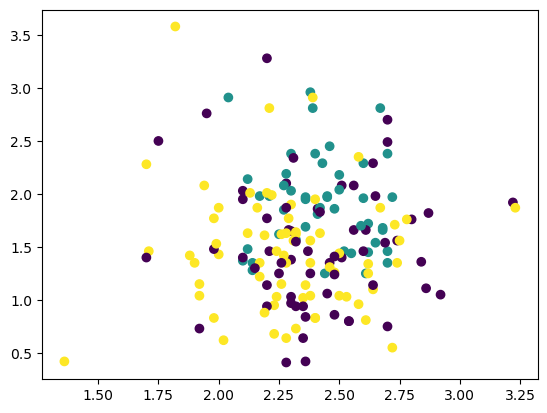

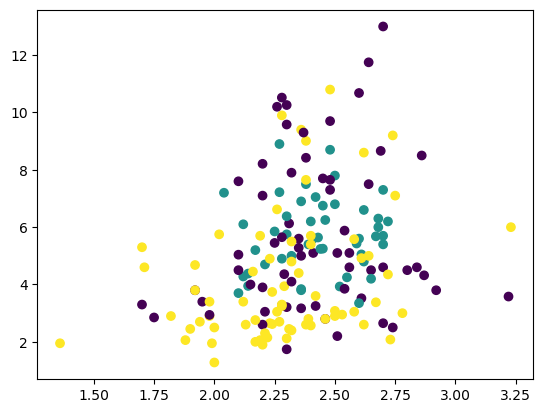

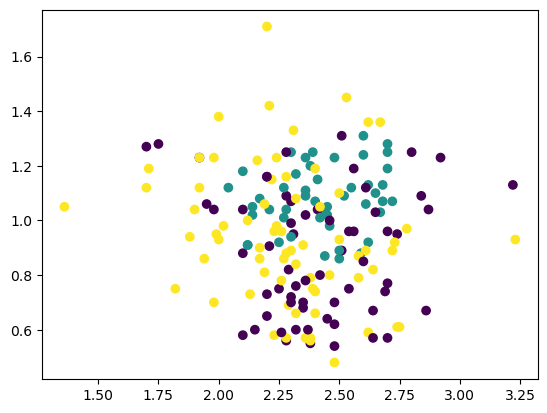

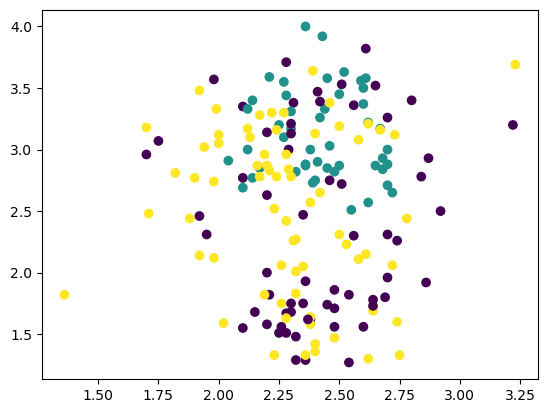

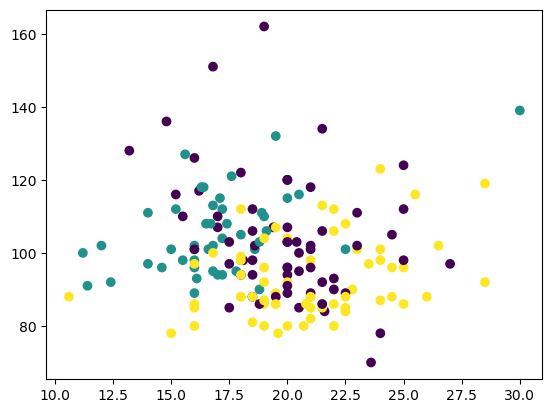

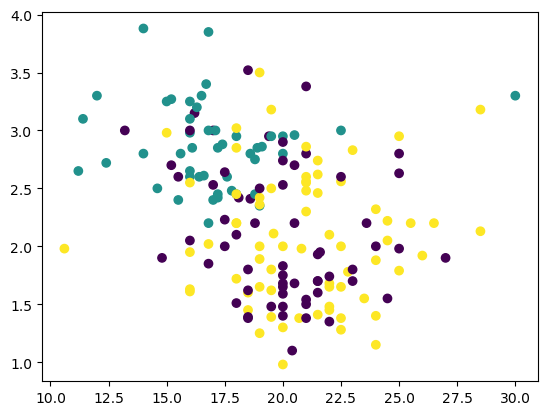

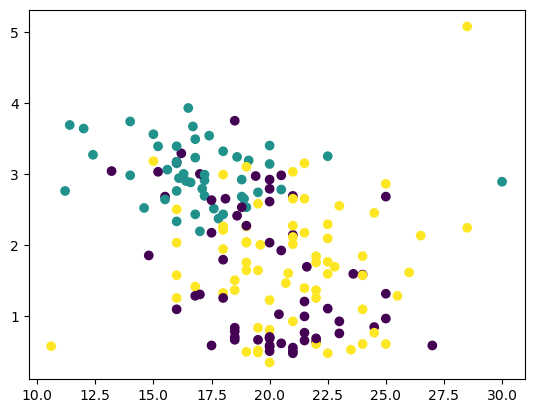

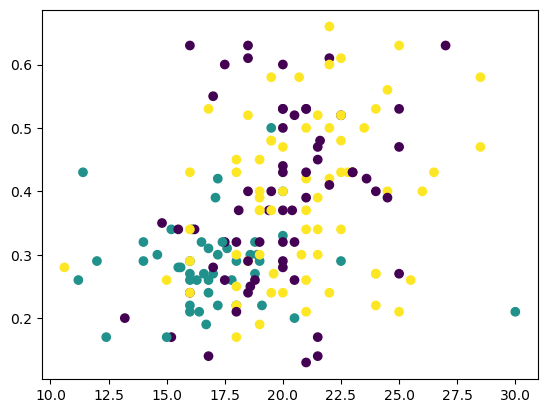

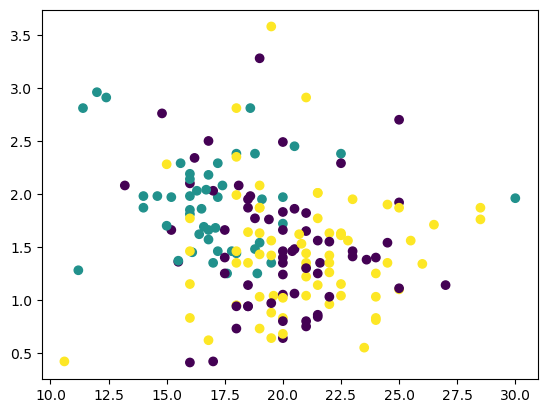

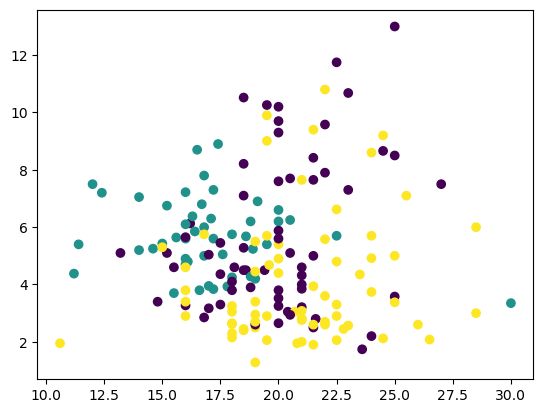

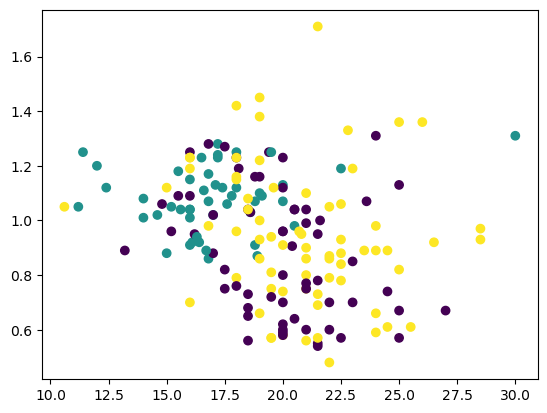

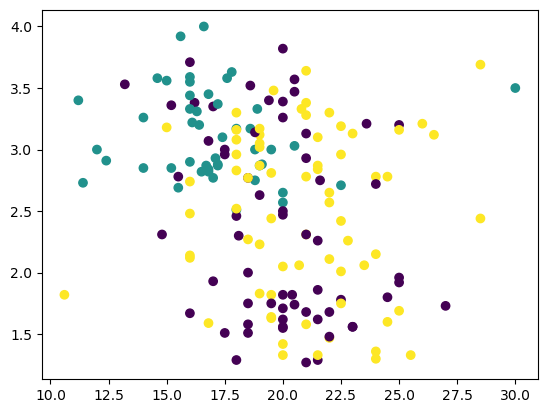

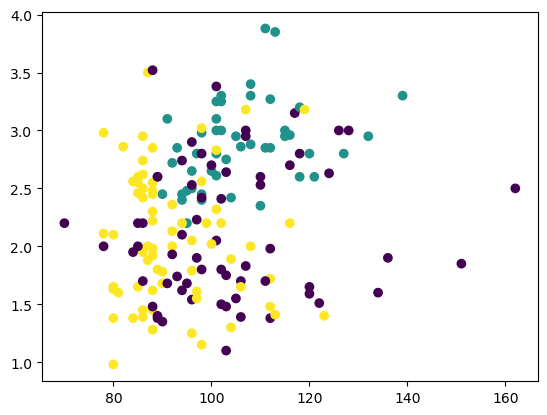

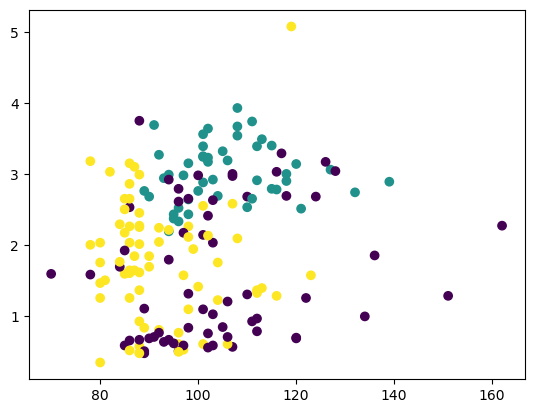

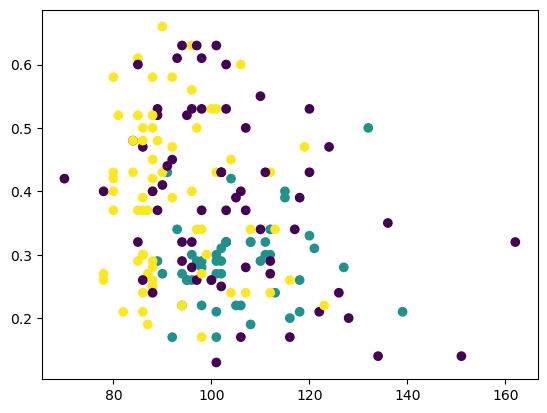

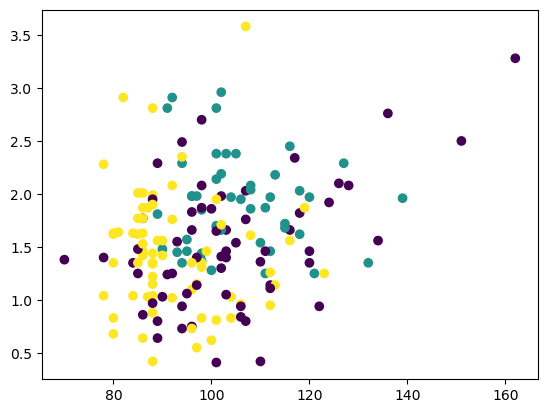

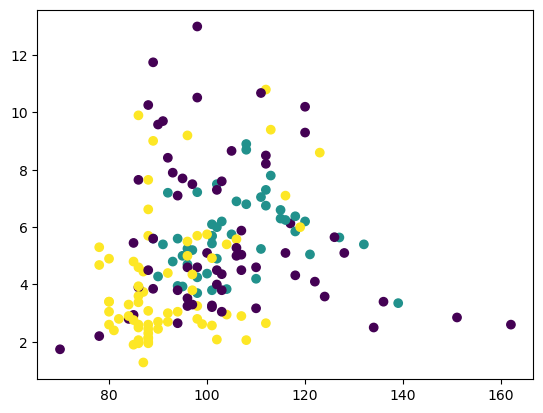

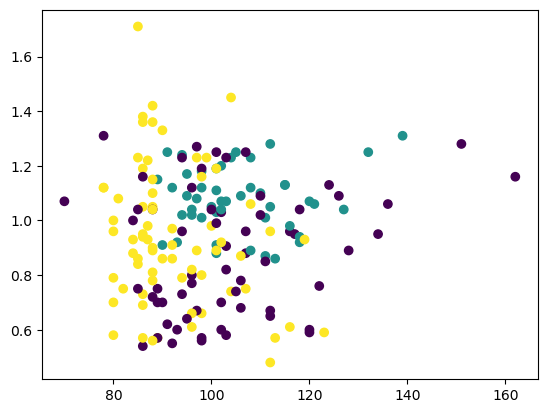

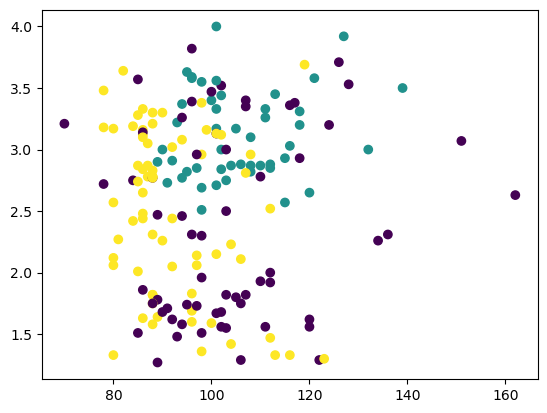

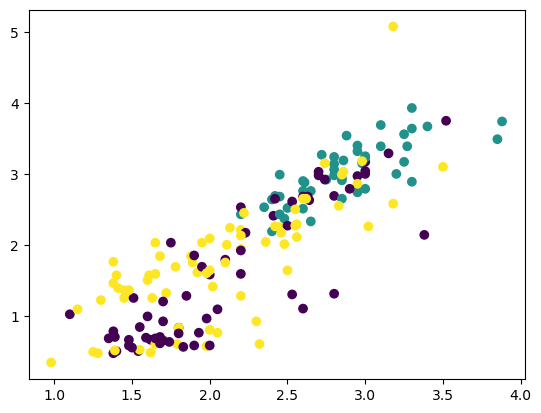

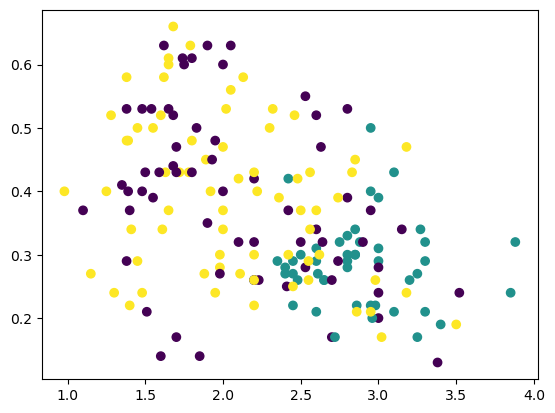

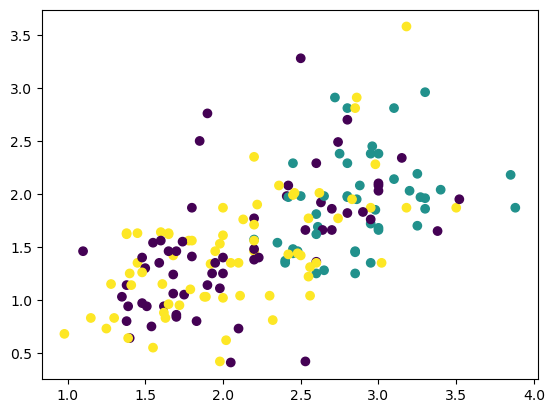

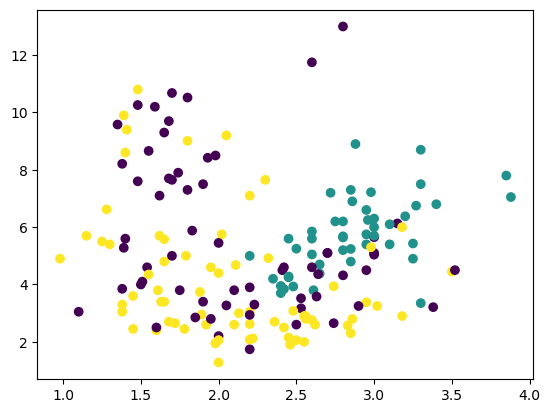

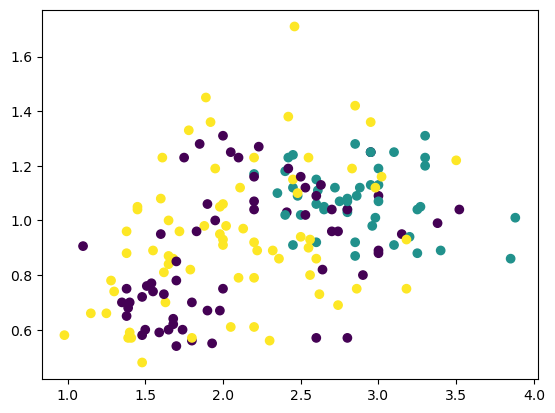

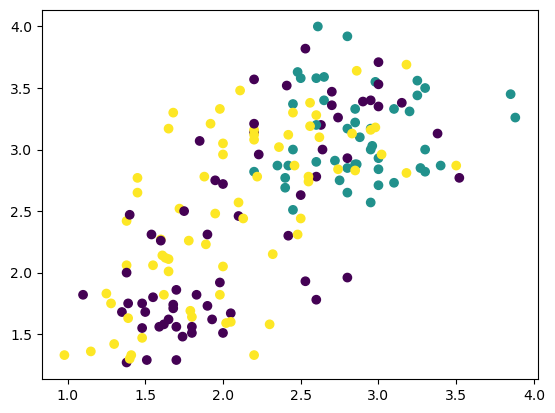

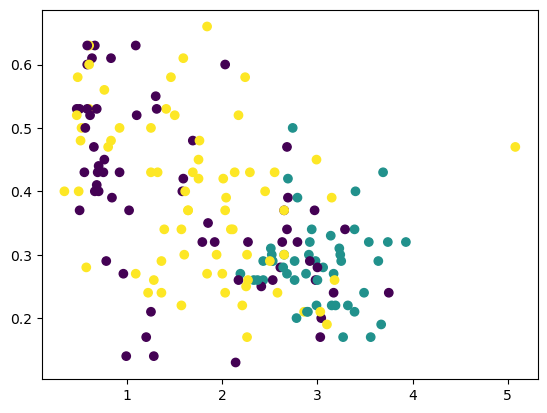

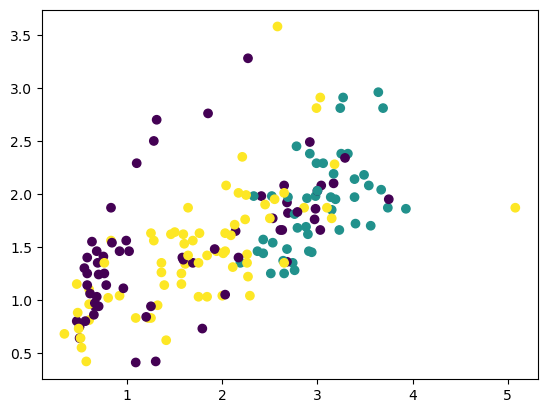

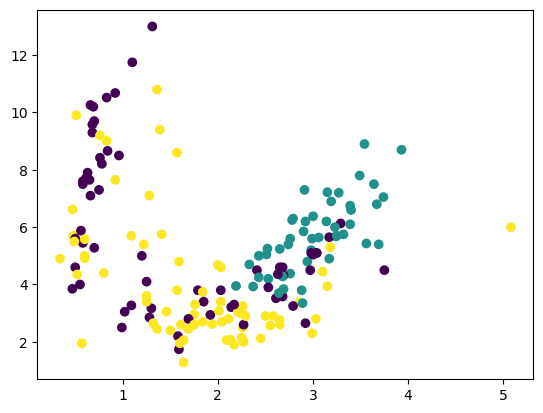

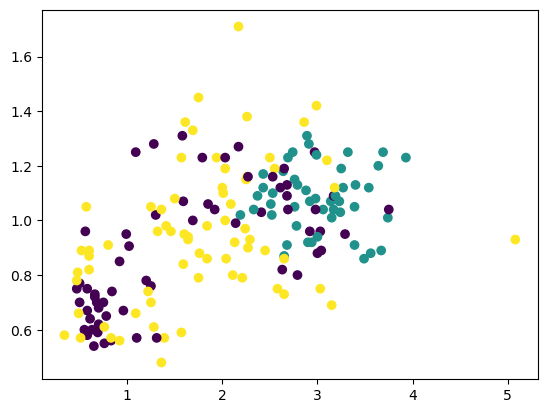

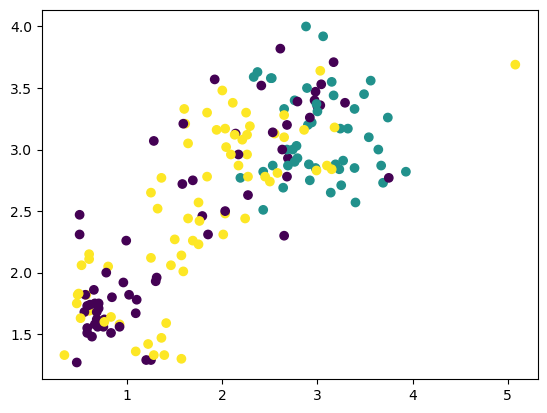

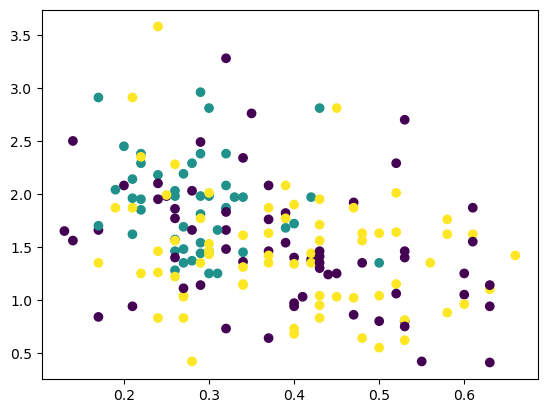

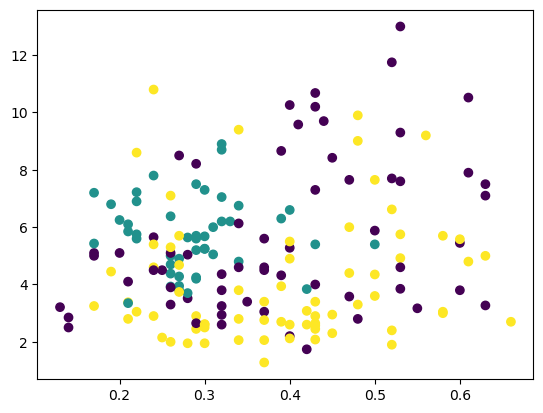

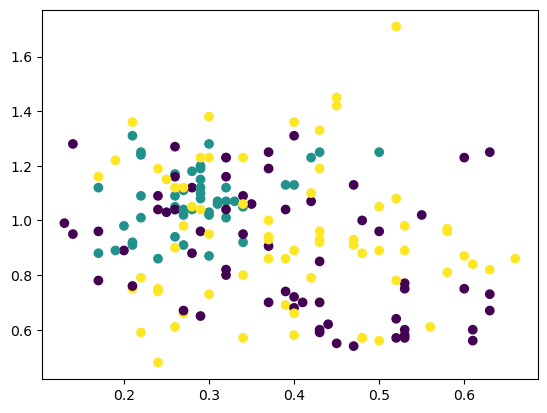

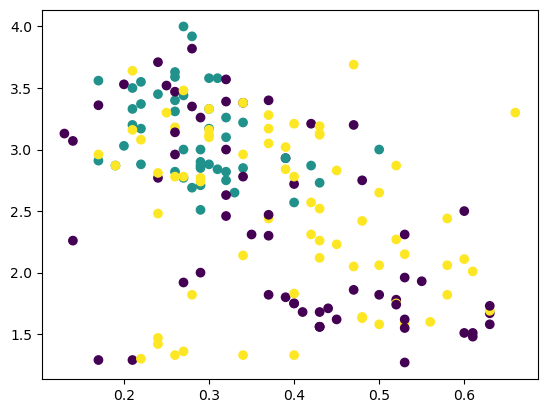

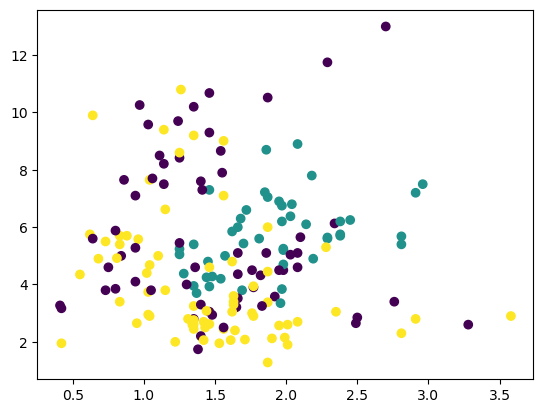

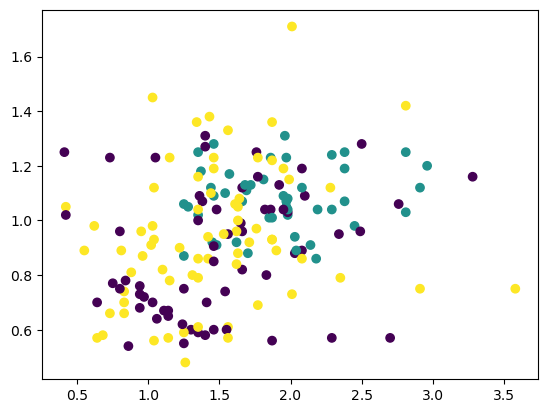

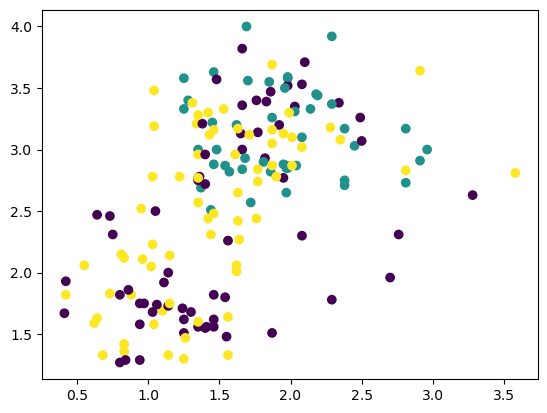

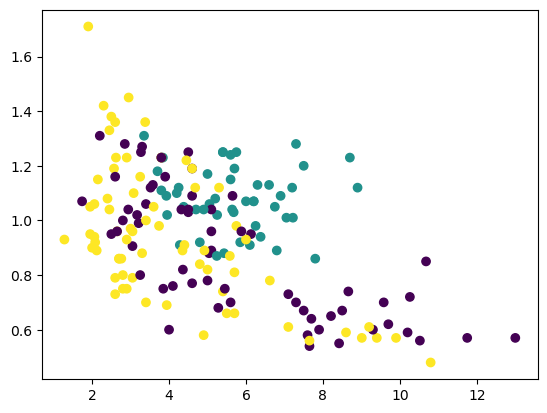

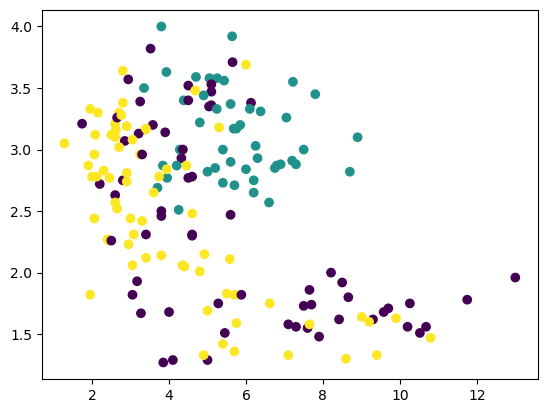

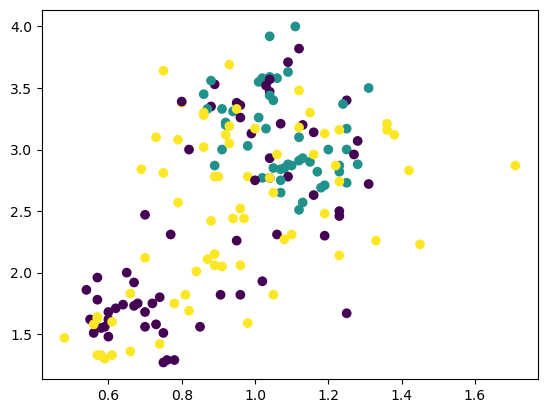

In [55]:
for cl in range(len(X.columns) - 1):
    for i in range(cl+1, len(X.columns) - 1):
        plt.scatter(X[X.columns[cl]], X[X.columns[i]], c=model.predict(X))
        plt.show()

In [56]:
clusters = str(model.labels_)
exl.append(
{
    'dataset': 'wine',
    'value_of_k': 3,
    'clusters': clusters
})

In [58]:
excel_df = pd.DataFrame(exl)
excel_df.to_excel('./output.xlsx')